# Kanton St.Gallen: construct investments vs. GDP
## Question
How much do construct investments influence the GDP (gross domestic product) of the kantone St.Gallen.  

### Strategie
With the correlation of data from the past, it is tried to get an infromation about wether the construct investments do have an influence on the GDP or not.

### Datasets
- The GDP in million SFr. per year, from 2008 - 2018, 
    - ([link](http://stada2.sg.ch/)/Arbeit und Unternehmen/Wertschöpfung/Bruttoinlandprodukt(BIP)[Mio. Fr.])
- The construct investment in million SFr. per year, from 1997 - 2019
    - ([link](http://stada2.sg.ch/)/Bau und Immobilien/Bauinvestitionen/Bauinvestitionen/Bauinvestitionen[Mio.Fr.])

In [1]:
# Init
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from pprint import pprint as pp
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# read in datasets
df_construct_investments = pd.read_excel("raw_datasets/construct_investments.xlsx", engine="openpyxl")
df_gdp = pd.read_excel("raw_datasets/gdp.xlsx", engine="openpyxl")

/home/ponte/.local/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# parse construct investments for St.Gallsen
df_construct_investments_st_gallen = df_construct_investments.loc[df_construct_investments['GEBIET_NAME'] == 'Kanton St.Gallen']
df_construct_investments_st_gallen.drop(df_construct_investments_st_gallen.columns[[0,1]], axis=1, inplace=True)
df_construct_investments_st_gallen = df_construct_investments_st_gallen.transpose().reset_index()
df_construct_investments_st_gallen.columns = ['index', "construct_investments"]
df_construct_investments_st_gallen.sort_values("index", inplace=True)
df_construct_investments_st_gallen = df_construct_investments_st_gallen.astype(float)

In [4]:
# parse GDP for St.Gallsen
df_gdp_st_gallen = df_gdp.loc[df_gdp['GEBIET_NAME'] == 'Kanton St.Gallen']
df_gdp_st_gallen.drop(df_gdp_st_gallen.columns[[0,1]], axis=1, inplace=True)
df_gdp_st_gallen = df_gdp_st_gallen.transpose().reset_index()
df_gdp_st_gallen.columns = ['index', "gdp"]
df_gdp_st_gallen.sort_values("index", inplace=True)
df_gdp_st_gallen = df_gdp_st_gallen.astype(float)

In [5]:
# merge datasets
df_merge = pd.merge(df_construct_investments_st_gallen, df_gdp_st_gallen)

## Correlate data
now as the datasets are parsed and prepaired in a merged DataFrame, a simple linear regression model is generated.  
**statsmodels.formula.api.ols** creates a linear model following an ordinaty least quare strategy  

In [6]:
model = smf.ols(formula='gdp ~ construct_investments', data=df_merge)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.722
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.133
Time:                        13:46:15   Log-Likelihood:                -94.524
No. Observations:                  11   AIC:                             193.0
Df Residuals:                       9   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               1.94e+

/home/ponte/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Validate
The strategy used this solution follows a k-fold cross validation:
- The construnction data is splitted several times and trained on it self
- The splits are randomly and non-overlapping

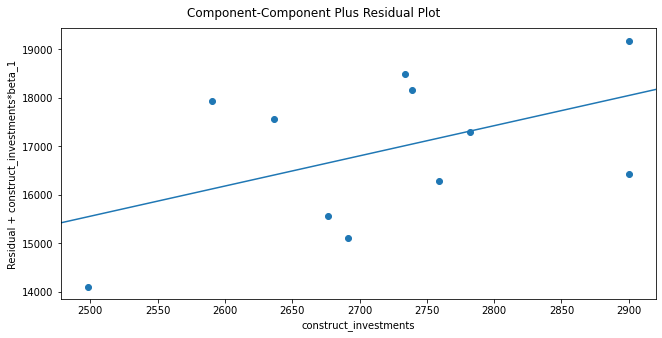

In [14]:
fig = sm.graphics.plot_ccpr_grid(result)
fig.set_size_inches(10,10)

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_merge['construct_investments'], df_merge['gdp'], 'o', label='Test Data')
ax.plot(np.linspace(0,1000,100), np.linspace(0,1000,100)*result.params['gdp'], label='Learned Model')
ax.legend(loc="best")
ax.set_title('Test Dataset')